In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import params as my
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
%config InlineBackend.figure_format = 'svg'

In [317]:
data = pd.read_csv('data.csv')

# 0 for KS -> 2pi event
# 259681:259683 for KS-KL decay near IP
# 259315: 259317
# 17233 KL->2pi event
# 54026:54028 KL->2pi KS->2pi event

sliced = data.iloc[0:1]
sliced

event = sliced['#'].values

In [318]:
vtx = data['# vtx with two tracks of opposite curvature'].to_numpy()
x_ = data['XV (cm)'].to_numpy()
y_ = data['YV(cm)'].to_numpy()
z_ = data['ZV(cm)'].to_numpy()
px1_ = data['Track1 PX(MeV) '].to_numpy()
py1_ = data['Track1 PY(MeV) '].to_numpy()
pz1_ = data['Track1 PZ(MeV) '].to_numpy()
px2_ = data['Track2 PX(MeV) '].to_numpy()
py2_ = data['Track2 PY(MeV) '].to_numpy()
pz2_ = data['Track2 PZ(MeV) '].to_numpy()

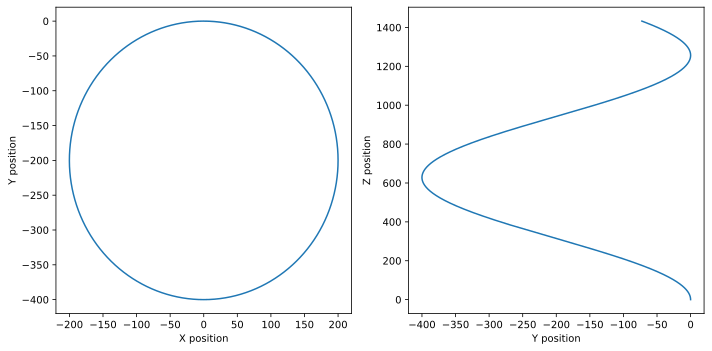

In [347]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_trajectory(charge, mass, initial_momentum, magnetic_field, decay_point, time_step, num_steps):
    # Convert initial momentum to velocity
    initial_velocity = [initial_momentum[i] / mass for i in range(3)]

    # Initialize arrays for positions and velocities
    positions = np.zeros((num_steps, 3))
    velocities = np.zeros((num_steps, 3))

    # Set initial conditions
    positions[0] = decay_point
    velocities[0] = initial_velocity

    # Calculate trajectory using the Euler method
    for i in range(1, num_steps):
        # Calculate the Lorentz force
        force = charge * np.cross(velocities[i - 1], magnetic_field)

        # Calculate the acceleration using F = ma
        acceleration = force / mass

        # Update the velocity and position using the Euler method
        velocities[i] = velocities[i - 1] + acceleration * time_step
        positions[i] = positions[i - 1] + velocities[i] * time_step

    return positions

# Input parameters
charge = 1.0  # Charge of the pion (in units of elementary charge)
mass = 139.6  # Mass of the pion (in MeV/c^2)
initial_momentum = [200.0, 0, 200.0]  # Initial momentum of the pions (in MeV/c)
magnetic_field = np.array([0, 0, 1.0])  # Magnetic field along the z-axis (in Tesla)
decay_point = np.array([0, 0, 0])  # Decay point of the kaon (initial position of the pions)
time_step = 0.01  # Time step for numerical integration
num_steps = 100000  # Number of steps for numerical integration

# Calculate trajectories of the pions
positions = calculate_trajectory(charge, mass, initial_momentum, magnetic_field, decay_point, time_step, num_steps)

# Plot the trajectories in 3D
fig = plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(positions[:, 0], positions[:, 1])
plt.xlabel('X position')
plt.ylabel('Y position')

plt.subplot(122)
plt.plot(positions[:, 1], positions[:, 2])
plt.xlabel('Y position')
plt.ylabel('Z position')
plt.tight_layout()
plt.show()
